In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Baca dataset
data = pd.read_csv('DataPenjualan.csv')

In [18]:
# Tambahkan fitur baru seperti rata-rata, median, dan standar deviasi
data['avg_price'] = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].mean(axis=1)
data['median_price'] = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].median(axis=1)
data['std_price'] = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].std(axis=1)

In [19]:
# Pisahkan fitur (X) dan target (y)
X = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']]
y = data['bahan_pokok']

In [20]:
# Label Encoding untuk kolom target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [21]:
# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [23]:
# Inisialisasi model Random Forest
rf = RandomForestRegressor(random_state=42)

In [24]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
# Inisialisasi Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [26]:
# Latih model menggunakan Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

Best Model: RandomForestRegressor(n_estimators=300, random_state=42)
Mean Squared Error: 6.41656349206349
Coefficient of Determination (R^2): 0.041428014905149246


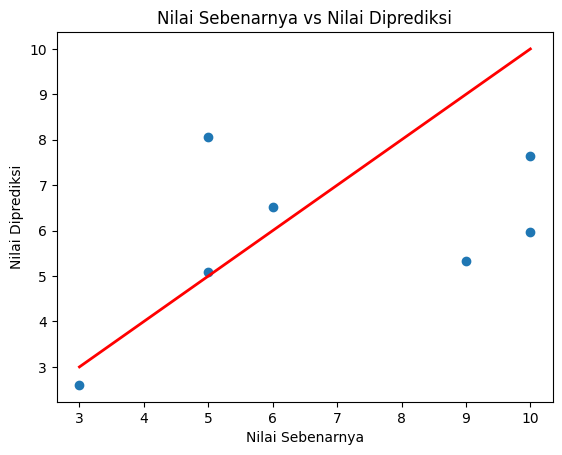

In [27]:
# Cek hasil Grid Search
if hasattr(grid_search, 'best_estimator_'):
    # Output hasil terbaik dari Grid Search
    best_model = grid_search.best_estimator_
    print('Best Model:', best_model)

    # Lakukan prediksi menggunakan model terbaik
    y_pred = best_model.predict(X_test)

    # Evaluasi model terbaik
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Mean Squared Error:', mse)
    print('Coefficient of Determination (R^2):', r2)

    # Visualisasi hasil prediksi
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2)  # Garis 45 derajat
    plt.xlabel('Nilai Sebenarnya')
    plt.ylabel('Nilai Diprediksi')
    plt.title('Nilai Sebenarnya vs Nilai Diprediksi')
    plt.show()
else:
    print('Grid Search tidak berhasil menemukan model terbaik.')

In [33]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
import pandas as pd


In [34]:
# Baca dataset
data = pd.read_csv('DataPenjualan.csv')

In [35]:
# Tambahkan fitur baru seperti rata-rata, median, dan standar deviasi
data['avg_price'] = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].mean(axis=1)
data['median_price'] = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].median(axis=1)
data['std_price'] = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].std(axis=1)

In [36]:
# Inisialisasi dictionary untuk menyimpan model untuk setiap bahan_pokok
models = {}

In [37]:
for bahan_pokok in data['bahan_pokok'].unique():
    # Filter data untuk bahan_pokok tertentu
    data_bahan = data[data['bahan_pokok'] == bahan_pokok]
    
    # Pisahkan fitur (X) dan target (y)
    X = data_bahan[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember', 'avg_price', 'median_price', 'std_price']]
    y = data_bahan['januari']  # Harga akan diprediksi
    
    # Periksa jumlah sampel
    n_samples = X.shape[0]
    
    # Tentukan metode cross-validation yang sesuai
    if n_samples < 2:
        print(f'Tidak cukup sampel untuk bahan_pokok: {bahan_pokok}. Lewati.')
        continue
    
    if n_samples < 5:
        kf = LeaveOneOut()
    else:
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Inisialisasi model regresi linear
    model = LinearRegression()
    
    # Evaluasi model menggunakan K-Fold Cross-Validation atau LOOCV
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()
    
    # Cetak nilai MSE jika jumlah sampel cukup
    print(f'Mean MSE for {bahan_pokok}: {mean_score}')
    
    # Latih model pada seluruh data untuk bahan_pokok ini
    model.fit(X, y)
    
    # Simpan model dalam dictionary
    models[bahan_pokok] = model

Mean MSE for Beras: 21404538656.641285
Mean MSE for Kedelai: 3400499.201745361
Mean MSE for Gula: 530715.2677526284
Mean MSE for Minyak Goreng: 2445415.0912989867
Mean MSE for Tepung Terigu: 2492805.623795089
Mean MSE for Daging Sapi: 39556496.85537117
Mean MSE for Daging Ayam Ras: 1000000.0
Mean MSE for Telur Ayam Ras: 3613120.062834138
Mean MSE for Ikan Bandeng: 4101457.3845832855
Mean MSE for Ikan Kembung: 14693721.39571589
Tidak cukup sampel untuk bahan_pokok: Daging Ayam Broiler. Lewati.
Tidak cukup sampel untuk bahan_pokok: Ikan Tongkol. Lewati.


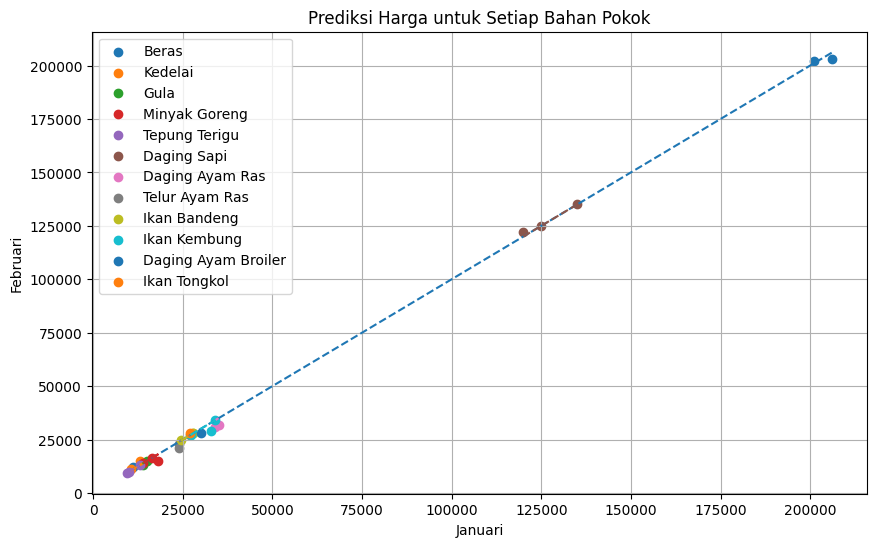

In [81]:
# Visualisasi prediksi harga untuk setiap bahan_pokok
plt.figure(figsize=(10, 6))
for bahan_pokok, model in models.items():
    # Filter data untuk bahan_pokok tertentu
    data_bahan = data[data['bahan_pokok'] == bahan_pokok]
    
    # Pisahkan fitur (X) untuk visualisasi
    X_vis = data_bahan[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']]
    
    # Prediksi harga menggunakan model yang sesuai
    prediksi_harga = model.predict(X_vis)
    
    # Plot data aktual
    plt.scatter(data_bahan['januari'], data_bahan['februari'], label=bahan_pokok)
    
    # Plot prediksi harga
    plt.plot(data_bahan['januari'], prediksi_harga, linestyle='--')

plt.xlabel('Januari')
plt.ylabel('Februari')
plt.title('Prediksi Harga untuk Setiap Bahan Pokok')
plt.legend()
plt.grid(True)
plt.show()